Sheet: CTI
Ra (Arithmetic Average Roughness): 747.9429770435185
RSm (Slope of the material ratio curve): 0.43701445542179784
Wz (Average Waviness Height): 5609.673181672404
Skewness: 0.7184064386052501
Kurtosis: 0.535474178133267



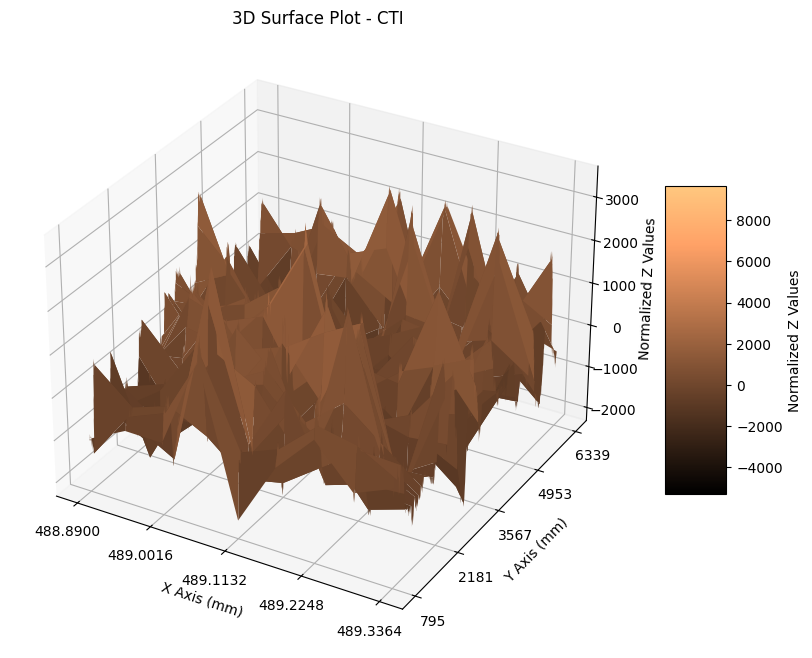

Sheet: Solvent Clean - PCB V4
Ra (Arithmetic Average Roughness): 1175.7402232522875
RSm (Slope of the material ratio curve): -0.34952535924139166
Wz (Average Waviness Height): 7202.632922443098
Skewness: 0.008602472179768393
Kurtosis: -0.6564875452425714



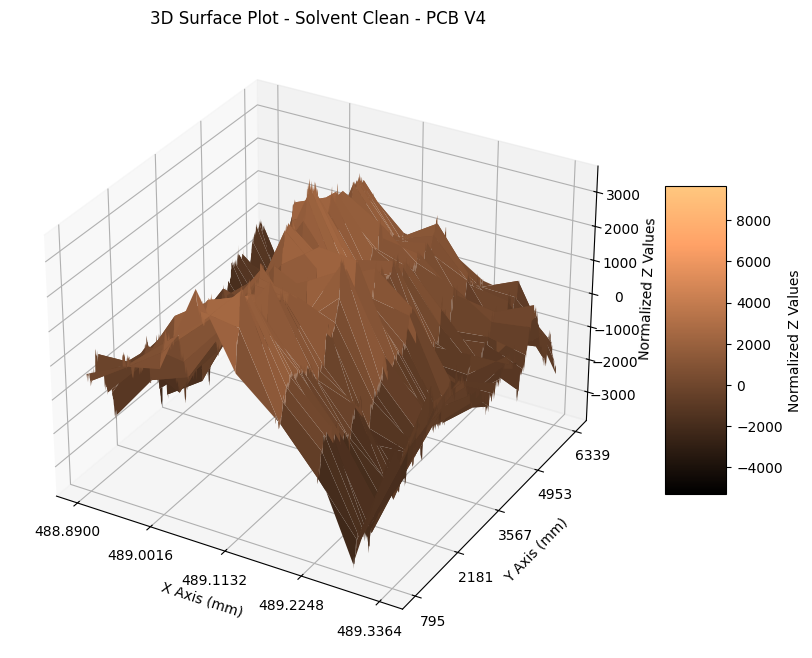

Sheet: Mechanical Clean - PCB V4 
Ra (Arithmetic Average Roughness): 376.14738576899725
RSm (Slope of the material ratio curve): -0.24642256214025202
Wz (Average Waviness Height): 2880.0983850894677
Skewness: 0.05479317688203314
Kurtosis: -0.08229383980068228



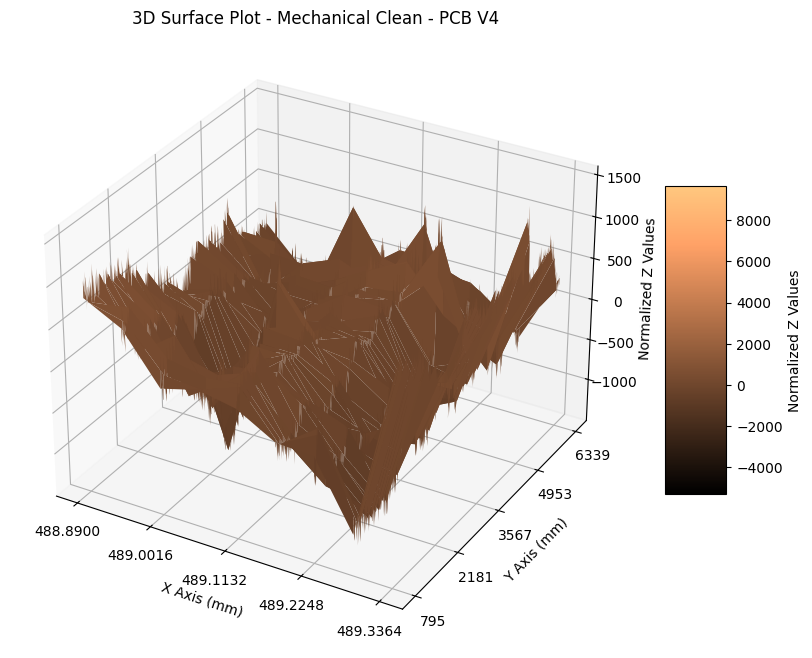

Sheet: Mechanical + Solvent Clean
Ra (Arithmetic Average Roughness): 326.8357456076381
RSm (Slope of the material ratio curve): -0.439749601609826
Wz (Average Waviness Height): 2485.607940694162
Skewness: -0.41230669941670245
Kurtosis: -0.19116154154267795



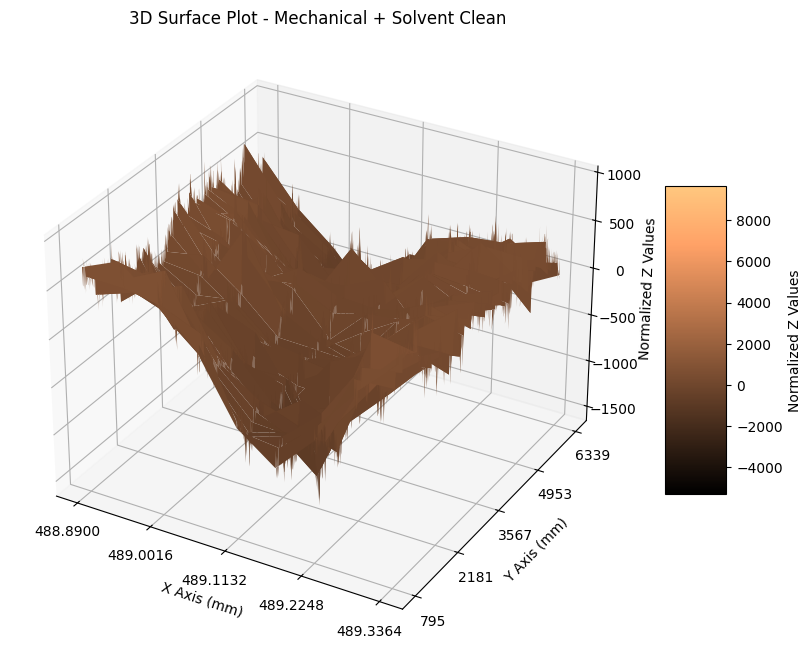

Sheet: 0-1.5V Slow Scans at 0.1M
Ra (Arithmetic Average Roughness): 985.3895602221237
RSm (Slope of the material ratio curve): 0.08804809308488128
Wz (Average Waviness Height): 6834.140992379323
Skewness: -0.1975625869715392
Kurtosis: -0.36763316567023097



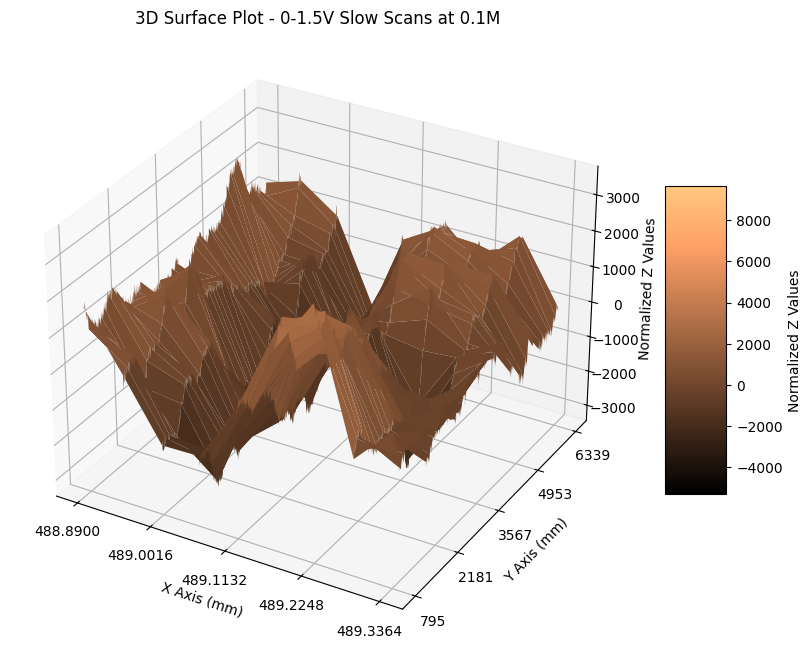

Sheet: 0-1.5V Slow Scans at 0.5M
Ra (Arithmetic Average Roughness): 985.3895602221237
RSm (Slope of the material ratio curve): 0.08804809308488128
Wz (Average Waviness Height): 6834.140992379323
Skewness: -0.1975625869715392
Kurtosis: -0.36763316567023097



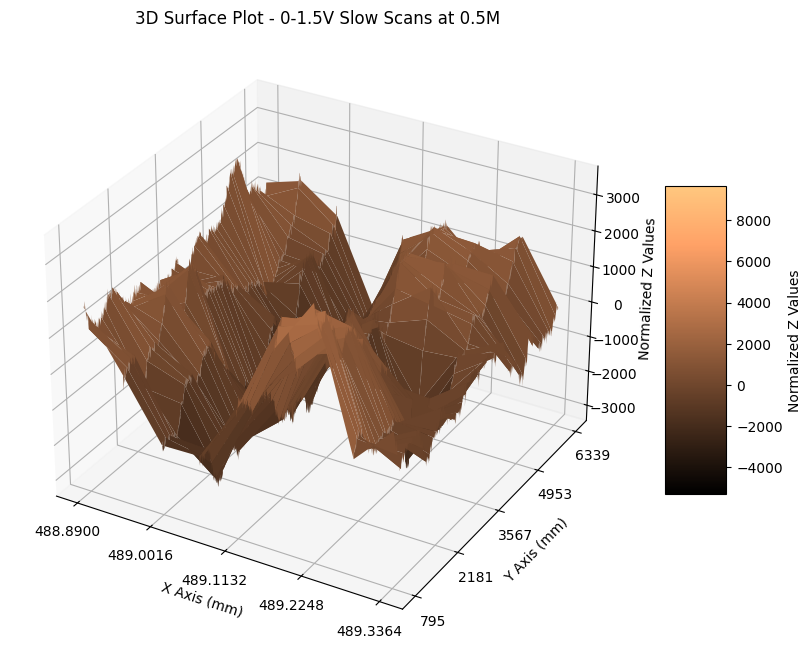

Sheet: 0-1.5V Fast Scans at 0.1M
Ra (Arithmetic Average Roughness): 1472.069613277336
RSm (Slope of the material ratio curve): 0.40360402391074207
Wz (Average Waviness Height): 12787.905299244427
Skewness: 1.1437500098029845
Kurtosis: 2.4477807145489026



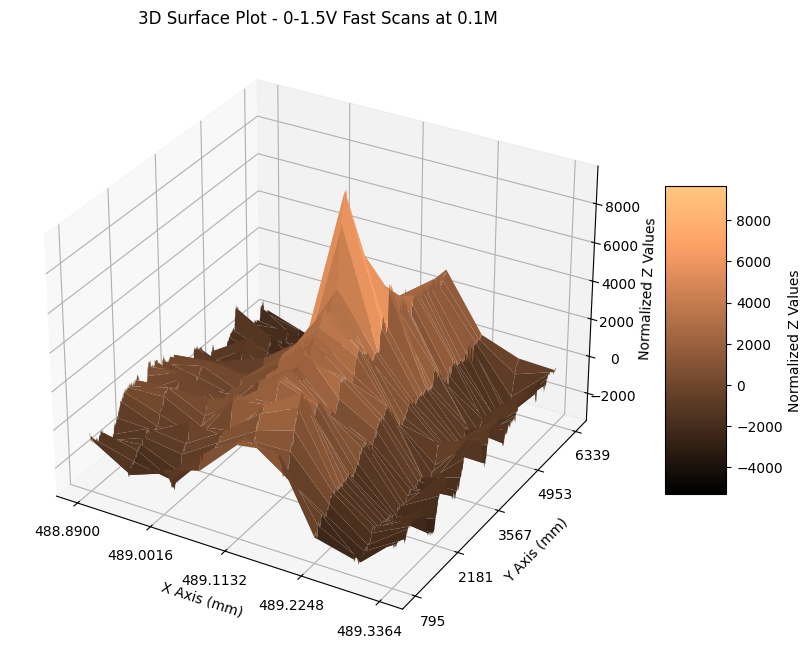

Sheet: 0-1.5V Fast Scans at 0.5M
Ra (Arithmetic Average Roughness): 1010.7431962321076
RSm (Slope of the material ratio curve): -0.2145772644720805
Wz (Average Waviness Height): 6564.209249506745
Skewness: -0.5469611801289042
Kurtosis: -0.2769605020926931



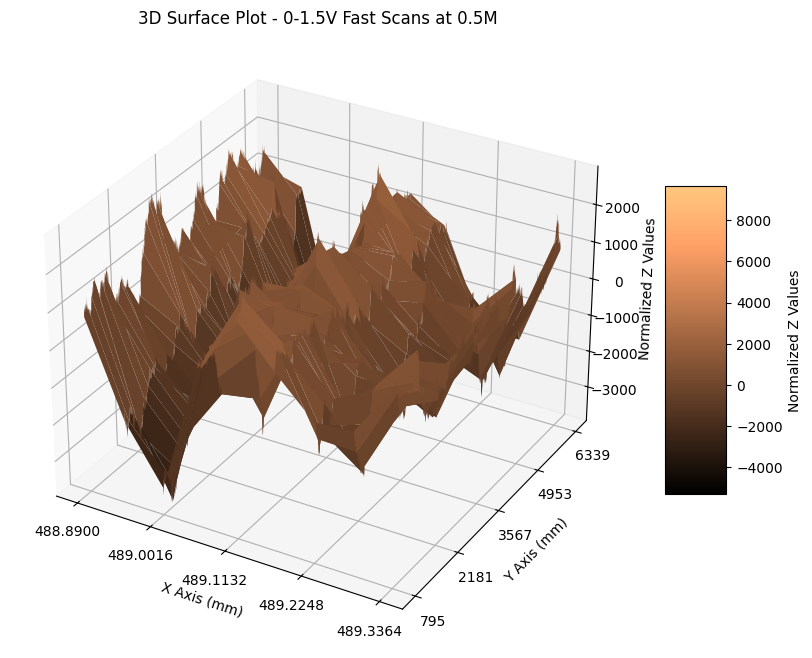

Sheet: 0.2-1.7V Fast Scans at 0.1M
Ra (Arithmetic Average Roughness): 658.4451980312908
RSm (Slope of the material ratio curve): 0.22600776489156846
Wz (Average Waviness Height): 4894.088892704256
Skewness: -0.28023133303536657
Kurtosis: -0.2193205378960874



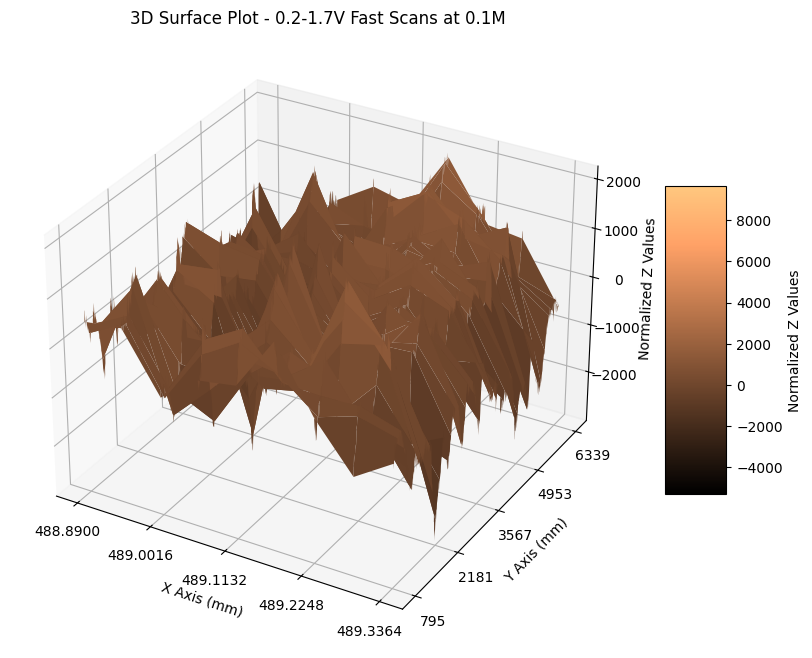

Sheet: 0.2-1.7V Fast Scans at 0.5M
Ra (Arithmetic Average Roughness): 738.8577112004355
RSm (Slope of the material ratio curve): 0.307763360394314
Wz (Average Waviness Height): 5744.0286093958875
Skewness: -0.3447483057738783
Kurtosis: 0.20453657599475594



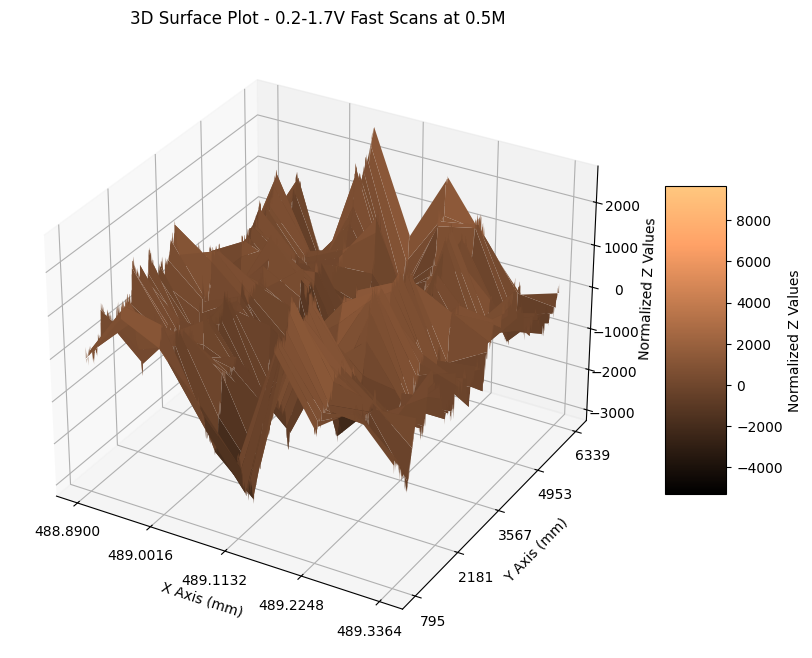

Sheet: 0.4-1.9V Fast Scans at 0.1M
Ra (Arithmetic Average Roughness): 1154.6177857685932
RSm (Slope of the material ratio curve): -0.25924244890720155
Wz (Average Waviness Height): 11055.588186138997
Skewness: 0.11986591404297679
Kurtosis: 0.9489281594720675



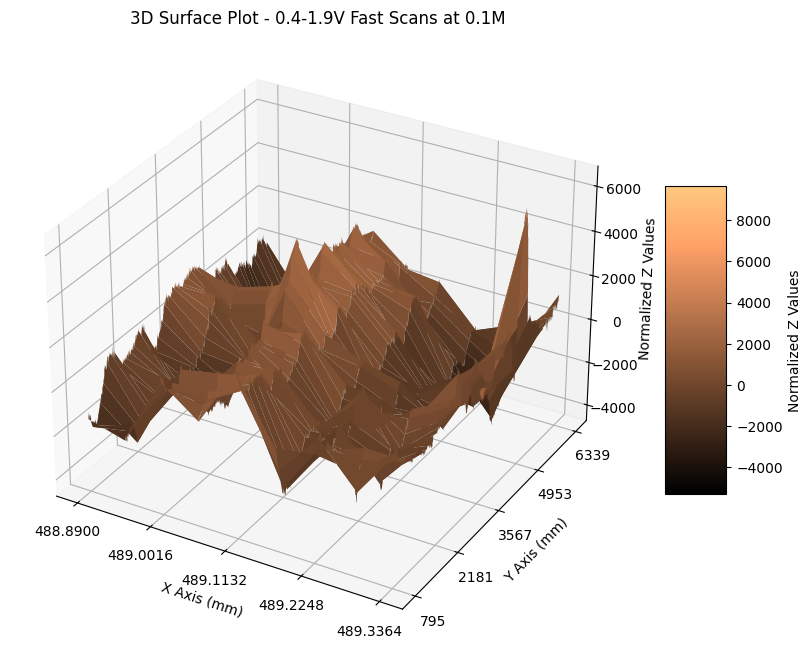

Sheet: 0.4-1.9V Fast Scans at 0.5M
Ra (Arithmetic Average Roughness): 670.5104068953675
RSm (Slope of the material ratio curve): 0.615666296053935
Wz (Average Waviness Height): 4860.367641526591
Skewness: -0.12496090749432504
Kurtosis: -0.34975481687633003



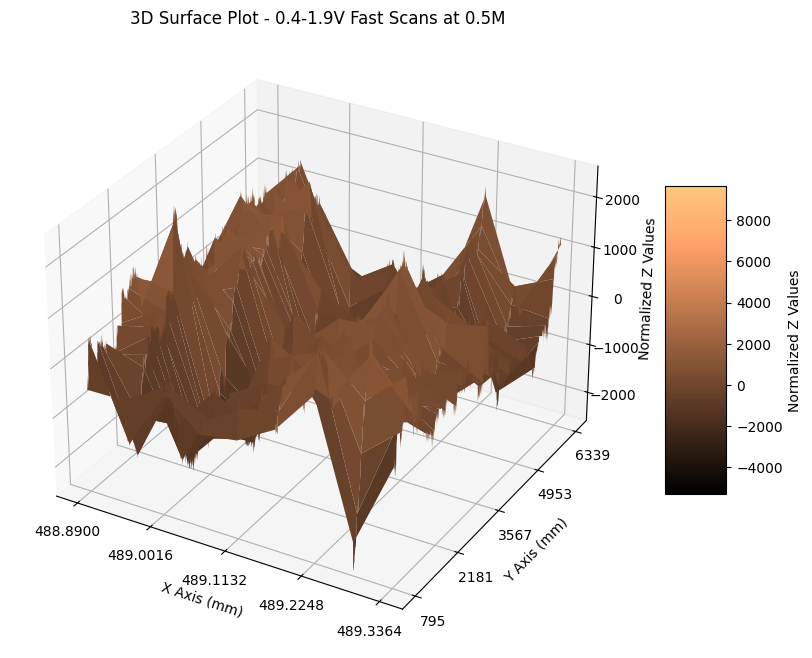

Sheet: T3 Hard Gold
Ra (Arithmetic Average Roughness): 1416.2437058732323
RSm (Slope of the material ratio curve): -1.9562210126458648
Wz (Average Waviness Height): 10016.552954708613
Skewness: -0.2640591608797949
Kurtosis: 0.08483801359213228



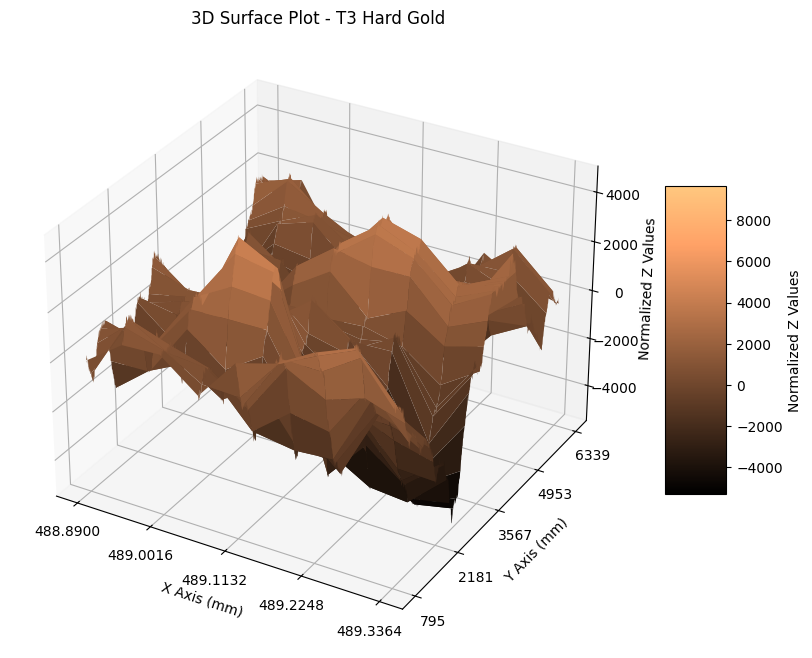

Sheet: T3 Immersion Gold
Ra (Arithmetic Average Roughness): 1265.0118607517702
RSm (Slope of the material ratio curve): -2.308197232171654
Wz (Average Waviness Height): 8451.6868711105
Skewness: -0.1473348358575262
Kurtosis: -0.19314647250223205



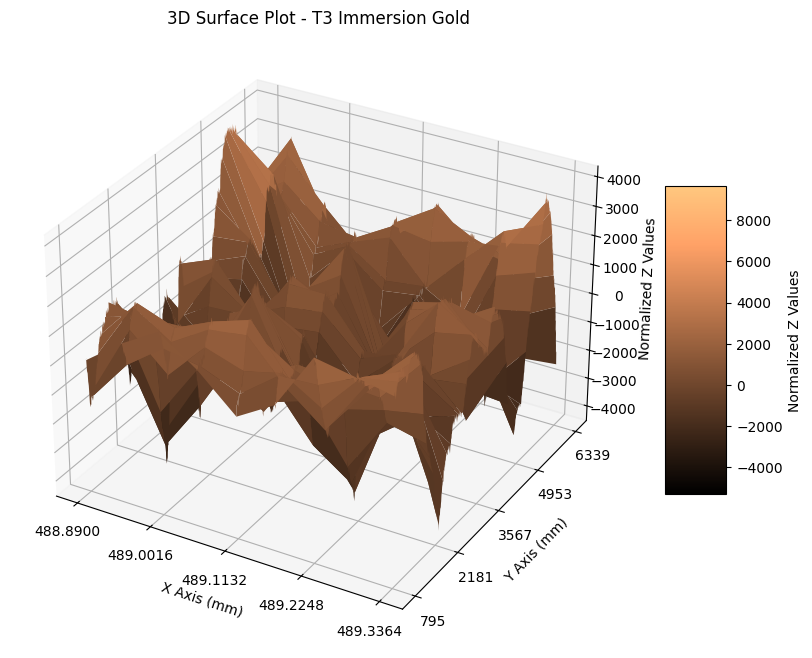

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

# Load Excel file and get sheet names
file_path = r'C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\2Full_Surface_Profilometry_Organized_Samples_for_Program.xlsx'
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

# Coordinates and resolutions
x_coord = 488.89
y_coord = 795.28
x_resolution = 0.049603
y_resolution = 5.5

def calculate_surface_roughness(Z):
    Ra = np.mean(np.abs(Z - np.mean(Z)))
    gradient, _ = np.gradient(Z)
    RSm = np.mean(gradient)
    return Ra, RSm

def calculate_waviness_parameters(Z):
    valleys = np.partition(Z.flatten(), 5)[:5]
    peaks = np.partition(Z.flatten(), -5)[-5:]
    Wz = np.mean(np.abs(peaks - valleys))
    return Wz

def calculate_spatial_parameters(Z):
    skewness = stats.skew(Z.flatten())
    kurtosis = stats.kurtosis(Z.flatten())
    return skewness, kurtosis

def normalize_surface(Z, X, Y):
    # Flatten the X, Y, Z arrays
    x_flat = X.flatten()
    y_flat = Y.flatten()
    z_flat = Z.flatten()
    
    # Fit a plane to the data
    A = np.c_[x_flat, y_flat, np.ones_like(x_flat)]
    C, _, _, _ = np.linalg.lstsq(A, z_flat, rcond=None)  # coefficients
    
    # Create the fitted plane
    Z_fit = C[0] * X + C[1] * Y + C[2]
    
    # Subtract the fitted plane from the original data to normalize
    Z_normalized = Z - Z_fit
    return Z_normalized

# Determine the global min and max for all sheets
global_z_min = float('inf')
global_z_max = float('-inf')

for sheet_name in sheet_names:
    # Load data from the current sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)
    Z = df.values

    # Create meshgrid for X and Y based on the shape of Z
    x_points = Z.shape[1]
    y_points = Z.shape[0]
    x_values = np.linspace(x_coord, x_coord + x_points * x_resolution, x_points)
    y_values = np.linspace(y_coord, y_coord + y_points * y_resolution, y_points)
    X, Y = np.meshgrid(x_values, y_values)
    
    # Normalize the Z values
    Z_normalized = normalize_surface(Z, X, Y)
    
    global_z_min = min(global_z_min, Z_normalized.min())
    global_z_max = max(global_z_max, Z_normalized.max())

for sheet_name in sheet_names:
    # Load data from the current sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)
    Z = df.values

    # Create meshgrid for X and Y based on the shape of Z
    x_points = Z.shape[1]
    y_points = Z.shape[0]
    x_values = np.linspace(x_coord, x_coord + x_points * x_resolution, x_points)
    y_values = np.linspace(y_coord, y_coord + y_points * y_resolution, y_points)
    X, Y = np.meshgrid(x_values, y_values)
    
    # Normalize the Z values
    Z_normalized = normalize_surface(Z, X, Y)
    
    # Calculate surface roughness parameters
    Ra, RSm = calculate_surface_roughness(Z_normalized)
    
    # Calculate waviness parameters
    Wz = calculate_waviness_parameters(Z_normalized)
    
    # Calculate spatial parameters
    skewness, kurtosis = calculate_spatial_parameters(Z_normalized)
    
    # Print calculated parameters
    print(f"Sheet: {sheet_name}")
    print(f"Ra (Arithmetic Average Roughness): {Ra}")
    print(f"RSm (Slope of the material ratio curve): {RSm}")
    print(f"Wz (Average Waviness Height): {Wz}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print()

    # Plotting the 3D surface plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create the surface plot with a gold colormap
    surf = ax.plot_surface(X, Y, Z_normalized, cmap='copper', vmin=global_z_min, vmax=global_z_max)
    
    # Add a color bar which maps values to colors
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('Normalized Z Values')
    
    # Label the axes with resolutions
    ax.set_xlabel('X Axis (mm)')
    ax.set_ylabel('Y Axis (mm)')
    ax.set_zlabel('Normalized Z Values')
    
    # Set ticks and labels based on resolution
    ax.set_xticks(np.linspace(x_coord, x_coord + x_points * x_resolution, 5))  # Adjust number of ticks as needed
    ax.set_yticks(np.linspace(y_coord, y_coord + y_points * y_resolution, 5))  # Adjust number of ticks as needed
    
    # Set the title to include the sheet name
    ax.set_title(f"3D Surface Plot - {sheet_name}")
    
    # Show the plot
    plt.show()
